__Binôme numéro 14 -- COPPENS Pierre-Louis et ZADORA Martin__

## Introduction

Dans ce projet, il s'agira d'étudier un jeu de données concernant des femmes diabétiques enceintes. Le diabète constitue un facteur de risque pour le bon déroulé de la grossesse. Pour chacune de ces femmes, nous disposons de 7 variables :
* `Age` : l'âge en années
* `Tension systolique` : la tension systolique en mmHg
* `Tension diastolique` : la tension diastolique en mmHg
* `Glycémie` : glycémie post-prandiale en mmol/L
* `Température` : température en °C
* `FC au repos` : fréquence cardiaque au repos
* `Risque` : degré de risque obstétrique (0 : faible, 1 : moyen, 2 : élevé)


Ce projet comporte trois partie :
1. Une analyse exploratoire des données
2. La construction d'un classifieur binaire permettant de séparer les femmes dont la grossesse est à risque de celles dont elle ne l'est pas
3. La construction d'un classifieur multi-classe permettant de séparer les grossesses en trois classes : hautement à risque, moyennement à risque, faiblement à risque.

## Instructions 
* Former un binôme et l'inscrire dans Moodle.
* Renseigner le numéro de binôme et vos noms tout en haut de ce notebook à l'emplacement indiqué.
* Déposer ce notebook complété **au plus tard le 10 juillet 2025, 23h59** sur Moodle.

La présence aux séances dédiés au mini-projet (20/06 et 7/07) est **notée**. 

Les questions **1 à 14** peuvent être traitées dès la première séance. 
La question **15** peut être traitée après la PC4.
Les questions **16 à 30** peuvent être traitées à partir de la PC5.

Pour des raisons pédagogiques (voir la note à ce sujet), **l'usage d'assistants de code ou d'agents conversationnels tels que ChatGPT, Copilot, Claude, LeChat est prohibé. Leur utilisation sera sanctionnée.**

### Question 1 (1pt)

Les données ont été récoltées dans une région défavorisée du monde, où les populations sont très pauvres et peuvent difficilement consulter. Quel peut être l'intérêt de déléguer à un algorithme la prédiction du risque obstétrique ? Quelles peuvent être les dérives (sociales, éthiques, économiques, psychologiques) d'une telle pratique ?


L'intérêt de déléguer à un algorithme la prédiction du risque obstétrique est de rendre accessible un premier diagnostique du risque obstétrique 
après un simple RDV chez un médecin généraliste et une prise de sang. 

Ce genre de solution de diagnostique se trouve d'ores et déjà dans le domaine médicale et sous forme plus complexe comme la solution Traumatrix (étudiée dans le cadre d'une 
étude avec la junior entreprise des Mines de Paris) qui permet la prise de décision rapide suite à un traumatisme. 

Les dérives possibles sont une surdépendance à l'IA dans le domaine médical, la perte de la relation patient-médecin (impact psychologique), des diagnostics erronés et
un impact environnemental non négligeable. 


## Librairies usuelles

In [2]:
import pandas as pd

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rc('font', **{'size': 12}) # règle la taille de police globalement pour les plots (en pt)

np.random.seed(19) 

## Chargement des données

Nous allons pour l'instant travailler avec le jeu de données d'entraînement `data/donnees_entrainement.csv` :

In [3]:
df_train = pd.read_csv('data/donnees_entrainement.csv')

Commençons par en extraire deux arrays, `X_train` et `y_train`, contenant d'une part les variables décrivant les observations et d'autre part leurs étiquettes :

In [4]:
X_train = np.array(df_train.drop('Risque', axis=1))
y_train = np.array(df_train['Risque'], dtype='int')
print(X_train)
print(y_train)

[[ 21.   85.   55.    7.   36.2  84. ]
 [ 36.  145.  100.    6.9  39.5  73. ]
 [ 15.5 120.   75.    7.4  39.   74. ]
 ...
 [ 53.5 100.   70.    7.7  36.2  68. ]
 [ 18.5 120.   70.    7.5  37.1  69. ]
 [ 21.5 100.   90.    6.8  37.3  66. ]]
[1 2 0 1 1 2 0 2 1 0 2 1 1 2 2 1 2 0 0 2 0 1 0 0 0 0 2 0 1 2 1 0 0 2 2 0 1
 0 0 0 1 1 0 1 2 2 2 1 0 2 1 0 1 0 2 1 0 1 1 0 0 0 2 0 1 0 0 0 0 1 0 2 0 2
 1 0 2 1 1 2 0 1 0 1 0 2 1 2 1 0 1 1 2 0 1 0 1 2 2 1 0 2 1 0 2 2 0 1 1 1 2
 1 0 2 1 0 1 1 2 1 2 1 2 2 1 0 2 0 1 1 1 0 0 1 1 2 1 1 0 1 2 2 2 1 0 1 2 0
 1 0 0 0 1 0 2 2 2 2 0 0 2 1 0 0 0 0 0 2 0 1 0 2 0 2 0 0 1 2 1 0 0 2 1 2 1
 1 1 2 0 2 1 0 0 2 1 1 1 2 0 1 0 1 2 0 1 0 2 0 0 2 1 1 1 0 1 2 2 0 0 1 1 0
 1 1 0 1 1 1 2 2 2 0 0 1 2 2 0 1 0 0 2 0 2 1 1 0 0 2 1 0 0 0 2 0 1 0 2 0 1
 1 0 0 2 0 1 2 2 1 2 2 0 1 1 0 1 1 0 2 2 2 1 2 0 2 2 0 0 1 2 0 1 0 1 1 2 1
 0 0 0 0 2 0 2 1 1 0 2 0 1 1 0 0 2 1 1 1 0 1 1 1 2 0 1 0 0 1 0 0 0 0 1 2 1
 0 1 2 1 0 1 1 0 2 2 2 1 2 0 1 1 0 2 2 0 2 1 0 1 2 0 1 1 2 1 2 0 0 1 0 0 0
 0 0 0 0 1

# 1. Exploration de données

## Distributions des variables

### Question 2 (1 pt)
Pour chaque variable, affichez un histogramme de sa distribution dans chacune des trois classes.

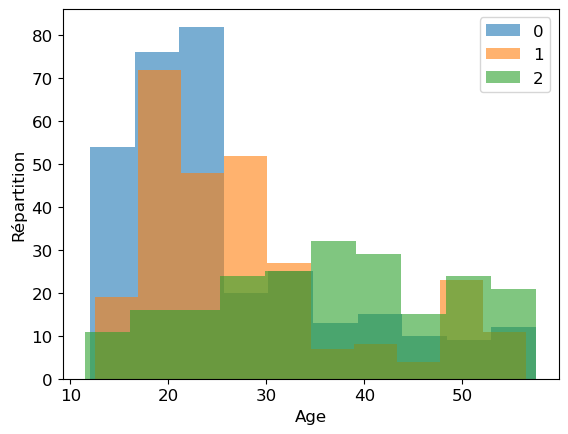

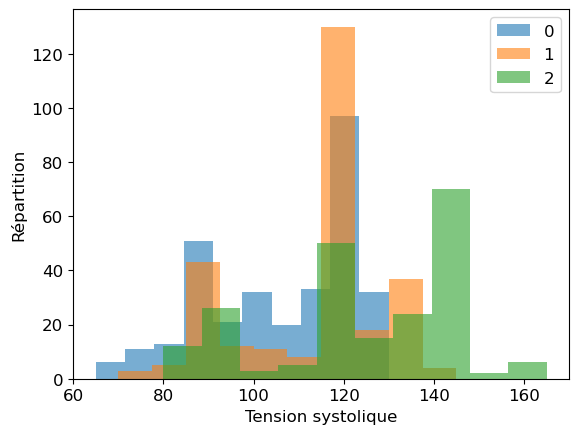

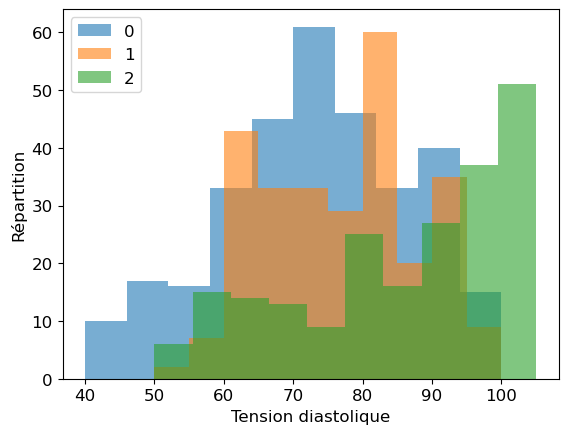

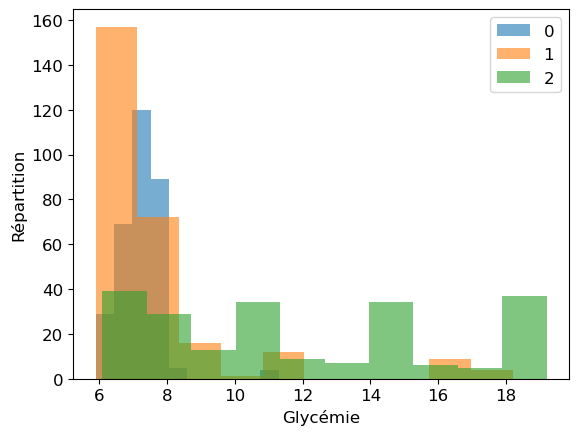

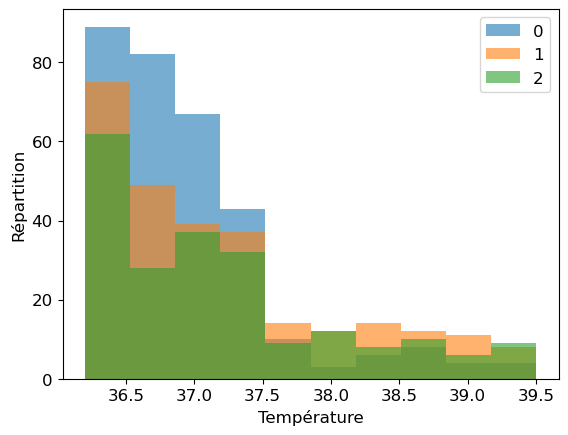

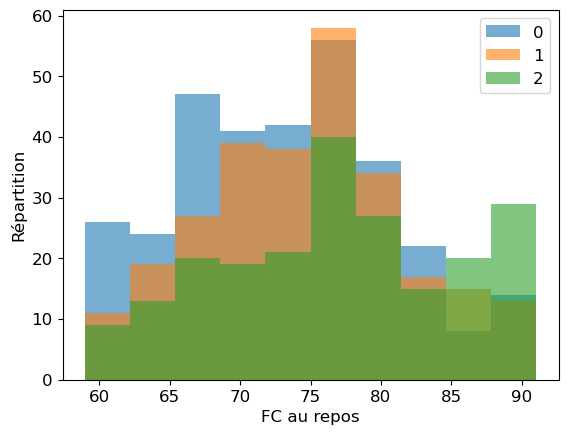

In [5]:
X_0 = X_train[y_train == 0]
X_1 = X_train[y_train == 1]
X_2 = X_train[y_train == 2]

plt.hist(X_0[:,0], alpha = 0.6)
plt.hist(X_1[:,0], alpha = 0.6)
plt.hist(X_2[:,0], alpha = 0.6)

plt.legend(['0', '1', '2'])
plt.xlabel("Age")
plt.ylabel("Répartition")
plt.show()

plt.hist(X_0[:,1], alpha = 0.6)
plt.hist(X_1[:,1], alpha = 0.6)
plt.hist(X_2[:,1], alpha = 0.6)

plt.legend(['0', '1', '2'])
plt.xlabel("Tension systolique")
plt.ylabel("Répartition")
plt.show()

plt.hist(X_0[:,2], alpha = 0.6)
plt.hist(X_1[:,2], alpha = 0.6)
plt.hist(X_2[:,2], alpha = 0.6)

plt.legend(['0', '1', '2'])
plt.xlabel("Tension diastolique")
plt.ylabel("Répartition")
plt.show()

plt.hist(X_0[:,3], alpha = 0.6)
plt.hist(X_1[:,3], alpha = 0.6)
plt.hist(X_2[:,3], alpha = 0.6)

plt.legend(['0', '1', '2'])
plt.xlabel("Glycémie")
plt.ylabel("Répartition")
plt.show()

plt.hist(X_0[:,4], alpha = 0.6)
plt.hist(X_1[:,4], alpha = 0.6)
plt.hist(X_2[:,4], alpha = 0.6)

plt.legend(['0', '1', '2'])
plt.xlabel("Température")
plt.ylabel("Répartition")
plt.show()

plt.hist(X_0[:,5], alpha = 0.6)
plt.hist(X_1[:,5], alpha = 0.6)
plt.hist(X_2[:,5], alpha = 0.6)

plt.legend(['0', '1', '2'])
plt.xlabel("FC au repos")
plt.ylabel("Répartition")
plt.show()

### Question 3 (1 pt)
Les valeurs prises par ces variables sont-elles surprenantes ? Cohérentes avec le degré de risque ?

Aucune variable ne semble particulièrement surprenante bien que certains résultats soient à relever : le risque 3 n'est atteint que pour des femmes de moins de 35 ans, avec un taux de glycémie inférieur à 40. Cela semble cohérent avec le degré de risque 

### Question 4 (1 pt)
Pensez-vous qu'il va être facile/difficile de prédire le risque de grossesse à risque en utilisant ces 6 variables ?

À priori, il semble difficile de prédire le risque de grossesse à risque à partir de ces variables. Même si certaines semblent témoigner du risque (glycémie, température)

## Réduction de dimension

Indépendamment de votre réponse à la question précédente, nous allons procéder à deux tentatives de réduction de dimension.

### Question 5 (1 pt)
Utilisez la décomposition en composantes principales de `X_train` pour visualiser les données en deux dimensions.

In [6]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_scaled = std_scale.transform(X_train)

from sklearn import decomposition
pca = decomposition.PCA(n_components=6)
pca.fit(X_scaled)

PCA(n_components=6)

Text(0, 0.5, 'Proportion de variance expliquée')

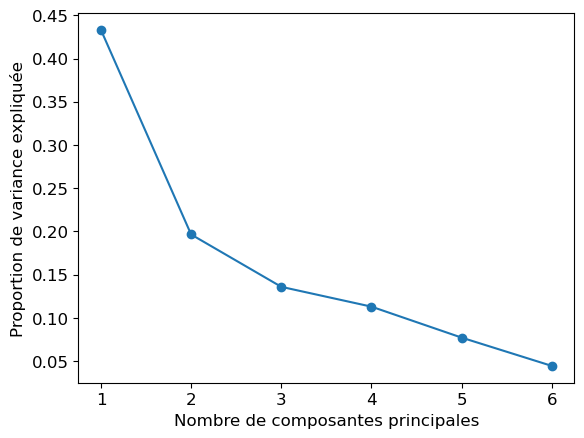

In [7]:

plt.plot(np.arange(1, 7), pca.explained_variance_ratio_, marker='o')
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Proportion de variance expliquée")

On visualise les poids en covariances des deux premières composantes principales, on ne couvre que 65% de la covariance. On réalise ensuite la projection sur les deux premières PCA.

(800, 2)


Text(0, 0.5, 'PC 2')

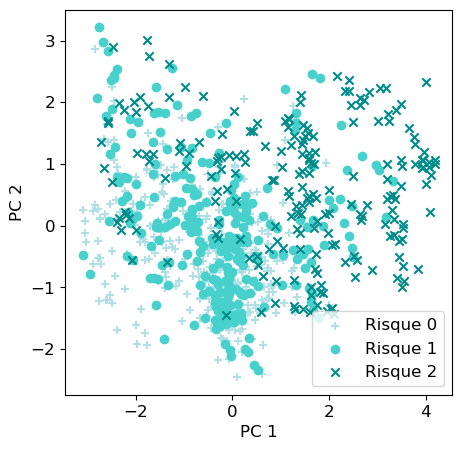

In [8]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)
print(X_projected.shape)

fig = plt.figure(figsize=(5, 5))

plt.scatter(X_projected[:, 0][y_train == 0], X_projected[:, 1][y_train == 0], marker = "+", c='powderblue', label = "Risque 0")
plt.scatter(X_projected[:, 0][y_train == 1], X_projected[:, 1][y_train == 1], marker = "o", c='mediumturquoise', label = "Risque 1")
plt.scatter(X_projected[:, 0][y_train == 2], X_projected[:, 1][y_train == 2], marker = "x", c='darkcyan', label = "Risque 2")

plt.legend(loc = 'best')

plt.xlabel("PC 1")
plt.ylabel("PC 2")

### Question 6 (1 pt) 
Pensez-vous utile d'utiliser cette ACP pour réduire la dimension des données pour construire un prédicteur de risque de grossesse difficile ?

On ne peut pas réellement tirer de conclusion de la décomposition, les 3 risques sont assez mélangés. On remarque tout de même que plus PC1 est élevée, plus le risque l'est .

### Question 7 (0,5 pt)
Affichez la matrice de corrélation entre les variables (étiquette exclue)

<Axes: >

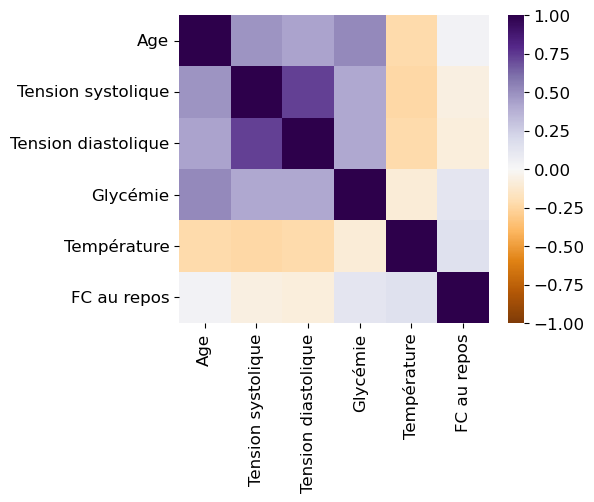

In [9]:
import seaborn as sns
# Calcul de la matrice de corrélation deux à deux
corr_matrix = df_train.drop(columns=['Risque']).corr()

# Initialisation figure
plt.figure(figsize=(5, 4))

# Affichage heatmap
sns.heatmap(corr_matrix, 
            vmin=-1, # borne inf des valeurs à afficher
            vmax=1, # borne sup des valeurs à afficher
            center= 0, # valeur médiane des valeurs à afficher,
            cmap='PuOr', # colormap divergente de violet (PUrple) vers orange (ORange)
           )


### Question 8 (0,5 pt)

Comment utiliser cette matrice de corrélation pour réduire la dimension des données ?

On peut procéder à la réduction de la matrice en choisissant les composantes principales en proportion de variance. 

# 2. Classification «à risque» vs «sans risque»

Nous allons maintenant transformer les étiquettes en étiquettes binaire, en regroupant les risques obstétriques moyens et élevés. Les étiquettes `1` et `2` seront regroupées en une seule étiquette `1`.

In [10]:
df_train_risk_vs_norisk = df_train.copy()

# Regrouper les étiquettes 1 et 2
df_train_risk_vs_norisk['Risque'] = np.where(df_train['Risque']==2, 1, df_train['Risque'])

y_train_risk_vs_norisk = np.array(df_train_risk_vs_norisk['Risque'], dtype='int')

df_train_risk_vs_norisk['Risque'].value_counts()
X_train = df_train_risk_vs_norisk.drop(['Risque'], axis = 1)

## Choix du critère d'évaluation
Pour cette section, on pourra se référer à la section 8.7.1 du poly.

### Question 9 (0,25 pt)
Quelle serait l'_accuracy_ (proportion d'observations correctement étiquetées) d'un modèle qui prédit que toutes les observations appartiennent à la classe majoritaire (c'est-à-dire la classe ayant le plus grand nombre d'observations dans les données) ? 

La classe majoritaire est celle des personnes à risque (484 à risque contre 316 sans risque).
$$\text{Accuracy} = \frac{TP+TN}{n} = \frac{TP}{n} = \frac{484}{800} = 0,605$$

### Question 10 (0,25 pt) 
La __précision équilibrée__ (_balanced accuracy_) d'un classifieur binaire est donnée par :

$$BA = \frac12 \left( \frac{\text{TP}}{\text{TP}+\text{FN}} +  \frac{\text{TN}}{\text{TN}+\text{FP}} \right)$$

Expliquez pourquoi ce critère d'évaluation est plus pertinent que l'accuracy pour sélectionner un classifieur optimal.

Il est facile d’avoir un bon score en prédisant que tous les exemples sont positifs, et de même il est facile d’obtenir une bonne spécificité en prédisant tous les exemples négatifs. Toutefois, on ne peut pas tricher pour obtenir une valeur basse sur les deux car elles évoluent de manière complémentaire. $BA$ est donc idéale pour évaluer rappel et spécificité.

Dans la suite du projet, nous utiliserons ce critère, implémenté dans la méthode [metrics.balanced_accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html) de scikit-learn.

## Plus proche voisin
L'algorithme du plus proche voisin associe à une observation $\vec{x}$ l’étiquette du point du jeu d’entraînement dont elle est la plus proche (par défaut, en distance euclidienne).

### Question 11 (0,5 pt)
En quoi consiste la phase d'entraînement d'un tel classifieur ?

Il s'agit d'__enregistrer__ les données d'entraînement __sans entraîner__ le modèle. Les données de test sont en permanence confrontées aux données d'entraînement.

### Question 12 (0,5 pt)
Quelle précision équilibrée attendez-vous _sur le jeu d'entraînement_ d'un algorithme du plus proche voisin ? Pourquoi ?

Sur le jeu d'entraînement, le plus proche voisin d'un point sera toujours lui-même. Ainsi la précision sera de 1 car un point aura toujours la bonne classe. 

### Question 13 (0,5 pt)
Vérifiez votre réponse sur les données, en utilisant la classe [neighbors.KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score

# Normalisation des données d'entraînement
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_rescaled = scaler.transform(X_train)

neighbours = KNeighborsClassifier(n_neighbors=1) # un seul plus proche voisin
neighbours.fit(X_train_rescaled, y_train_risk_vs_norisk)

# Prédiction sur les données d'entraînement
y_pred = neighbours.predict(X_train_rescaled)
print(f'Précision équilibrée pour 1 plus proche voisin : {balanced_accuracy_score(y_train_risk_vs_norisk, y_pred)}')

Précision équilibrée pour 1 plus proche voisin : 1.0


Commentaire : très bonne précision car on effectue un test sur les données d'entraînement. Or, l'étiquette testée est déjà enregistrée dans le modèle. Le plus proche voisin sera naturellement lui-même et donc la bonne classe lui sera associée. 

### Question 14 (0,5 pt)
Pour cet algorithme, vaut-il mieux utiliser les données d'origine ou les données centrées-réduites ? Justifiez votre réponse.

Il vaut mieux les données centrées-réduites car on travaille en distance euclidienne, donc il faut préférentiellement avoir un nombre sans dimension à l'intérieur d'une norme (et non des unités différentes).

## K plus proches voisins
L'algorithme des $K$ plus proche voisins associe à une observation $\vec{x}$ l’étiquette qui est majoritaires parmi celle des $K$ points du jeu d’entraînement dont elle est la plus proche (par défaut, en distance euclidienne).

### Question 15 (1,5 pt)
Utilisez une recherche sur grille avec une validation croisée en 10 _folds_ (voir amphi 7 et PC5) pour déterminer une valeur optimale de $K$. 

* Justifiez votre choix de grille de valeurs.
* Illustrez par un graphique approprié votre exploration de cette grille.
* Commentez ce graphique.
* Reportez la valeur optimale de l'hyperparamètre et la précision équilibrée correspondante.

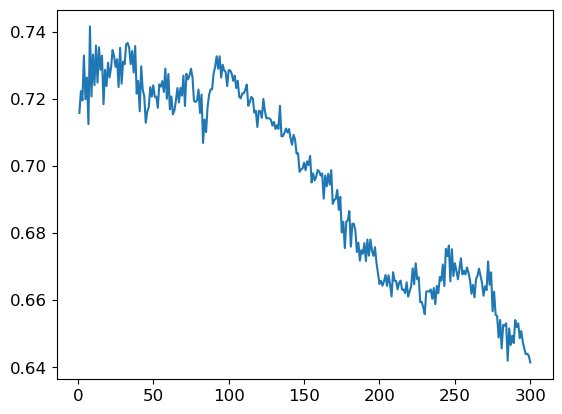

Meilleur : k = 8
Précision associée : 0.7416049484309852


In [12]:
from sklearn.model_selection import GridSearchCV

liste_k = np.arange(1,301, dtype=np.uint64)
grille_param = {'n_neighbors': liste_k}

kvoisins = KNeighborsClassifier()
grille_kvoisins = GridSearchCV(kvoisins,
                               grille_param,
                               scoring='balanced_accuracy',
                               cv=10) # 10 splits

grille_kvoisins.fit(X_train_rescaled, y_train_risk_vs_norisk)

plt.plot(liste_k, grille_kvoisins.cv_results_['mean_test_score'])
plt.show()

print(f"Meilleur : k = {grille_kvoisins.best_params_['n_neighbors']}")
print(f'Précision associée : {np.max(grille_kvoisins.cv_results_['mean_test_score'])}')

__Justification de la grille de valeurs__: on peut choisir au maximum 799 voisins car c'est le nombre d'échantillons d'entraînement. Au-delà de 100, il y a trop de voisins à tester et on perd l'esprit du KNN.

## Régression logistique
Le pendant pour la classification binaire de la régression linéaire (amphi 7 et PC 5) est la __régression logistique__ (PC 6). Dans scikit-learn, elle est implémentée par la classe [linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

### Question 16 (1 pt) 
Utilisez une recherche sur grille avec une validation croisée en 10 _folds_ pour déterminer une valeur optimale du coefficient de régularisation d'une régression logistique. 

* Justifiez votre choix de type de régularisation et de grille de valeurs. 
* Illustrez par un graphique approprié votre exploration de cette grille. 
* Commentez ce graphique.
* Reportez la valeur optimale de l'hyperparamètre et la précision équilibrée correspondante.

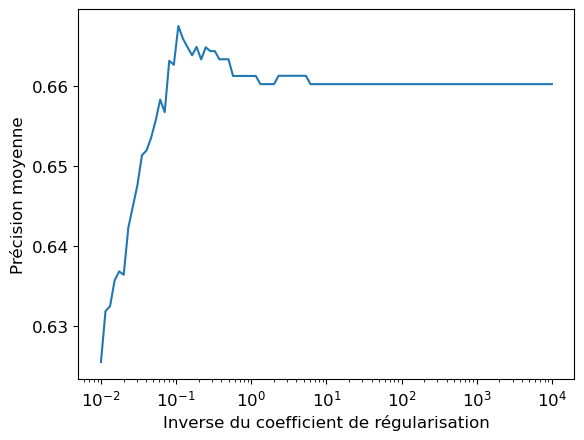

Meilleur : C = 0.10722672220103231
Précision associée : 0.6674542599297785


In [13]:
from sklearn.linear_model import LogisticRegression

c_vals = np.logspace(-2,4,100)
grille_param = {'C': c_vals}

logistic = LogisticRegression(random_state=42)
grille = GridSearchCV(logistic,
                      grille_param,
                      scoring='balanced_accuracy',
                      cv=10) 

grille.fit(X_train_rescaled, y_train_risk_vs_norisk)

plt.xscale('log')
plt.plot(c_vals, grille.cv_results_['mean_test_score'])
plt.xlabel('Inverse du coefficient de régularisation')
plt.ylabel('Précision moyenne')
plt.show()

print(f"Meilleur : C = {grille.best_params_['C']}")
print(f'Précision associée : {np.max(grille.cv_results_['mean_test_score'])}')

On remarque que le graphique est en cloche (maximum vers 0.1). On en déduit le paramètre optimal : $\lambda = \frac{1}{0.107}$. 

## Algorithme non-linéaire

### Question 17 (2pt)
Choisissez maintenant un algorithme permettant d'apprendre un modèle non-linéaire parmi ceux du chapitre 9 :
* arbre de décision : [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* forêt aléatoire : [ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* machine à vecteur de support à noyau : [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
* perceptron multi-couche : [neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

Utilisez encore une fois une recherche sur grille avec une validation croisée en 10 _folds_ pour sélectionner le(s) hyperparamètre(s) le(s) plus pertinent(s).

* Justifiez votre choix d'hyperparamètre(s) à optimiser.
* Justifiez votre choix de grille de valeurs pour ces ou cet hyperparèmtre(s).
* Illustrez par un graphique approprié votre exploration de cette grille.
* Commentez ce graphique.
* Reportez la ou les valeur(s) optimale(s) d'hyperparamètre(s) et la précision équilibrée correspondante.

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .....................................

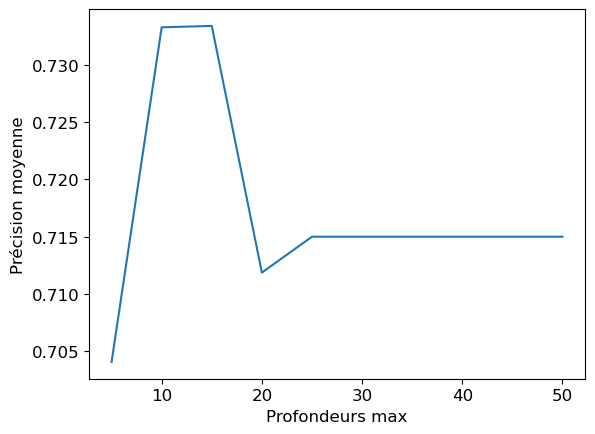

Meilleur paramètre : profondeur max = 15
Précision associée : 0.7333895655036209


In [14]:
# On choisit l'arbre de décision.

from sklearn.tree import DecisionTreeClassifier

max_depths = np.linspace(5,50,10, dtype = int)
grille_param = {
    'max_depth': max_depths,
}

arbre = DecisionTreeClassifier(random_state=42)
recherche = GridSearchCV(estimator=arbre, param_grid=grille_param, 
                         cv=10, n_jobs=-1, verbose=2, scoring='balanced_accuracy')

recherche.fit(X_train_rescaled, y_train_risk_vs_norisk)

plt.plot(max_depths, recherche.cv_results_['mean_test_score'])
plt.xlabel('Profondeurs max')
plt.ylabel('Précision moyenne')
plt.show()

# On retourne maintenant la précision équilibrée associée au meilleur modèle.
print(f'Meilleur paramètre : profondeur max = {recherche.best_params_['max_depth']}') # affiche les meilleurs paramètres
print(f'Précision associée : {np.max(recherche.cv_results_['mean_test_score'])}')

## Classification après réduction de dimension

Nous allons maintenant évaluer l'impact d'une réduction de dimension sur la qualité de l'apprentissage.

### Question 18 (0,25 pt)
Quel algorithme (k plus proches voisins ; régression logistique ; algorithme non-linéaire de la question 16) vous a permis d'obtenir la meilleure performance ? 

Pour l'instant, la meilleure précision est obtenue pour l'algorithme des 8-plus proches voisins.

### Quesion 19 (0,25 pt)
Utilisez le travail des questions 4 à 7 pour créer une nouvelle matrice représentant les données dans moins de dimensions qu'originellement. 

In [15]:
# Pour les données d'entraînement
pca = decomposition.PCA(n_components=2)
pca.fit(X_train_rescaled)
X_train_projected = pca.transform(X_train_rescaled)


### Question 20 (0,25 pt)
Utilisez encore une fois une recherche sur grille pour optimiser les performances de cet algorithme, mais entrainé sur cette nouvelle matrice. 

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END ........................................max_depth=5; total time=   0.0s
[CV] END .......................................max_depth=10; total time=   0.0s
[CV] END .....................................

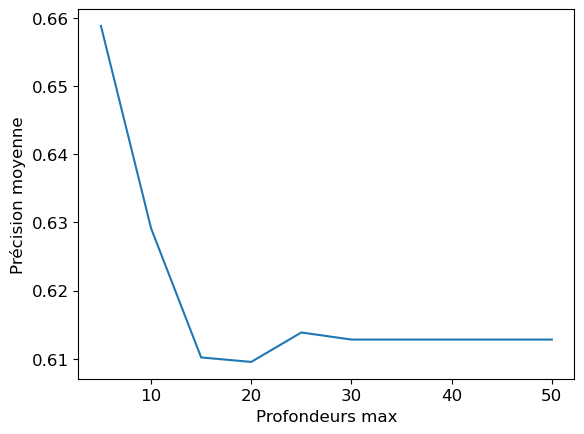

Meilleur paramètre : profondeur max = 5
Précision associée : 0.6587989631336406


In [16]:
max_depths = np.linspace(5,50,10, dtype = int)
grille_param = {
    'max_depth': max_depths,
}

arbre = DecisionTreeClassifier(random_state=42)
recherche = GridSearchCV(estimator=arbre, param_grid=grille_param, 
                           cv=10, n_jobs=-1, verbose=2, scoring='balanced_accuracy')

recherche.fit(X_train_projected, y_train_risk_vs_norisk)


plt.plot(max_depths, recherche.cv_results_['mean_test_score'])
plt.xlabel('Profondeurs max')
plt.ylabel('Précision moyenne')
plt.show()
# On retourne maintenant la précision équilibrée associée au meilleur modèle.
print(f'Meilleur paramètre : profondeur max = {recherche.best_params_['max_depth']}') # affiche les meilleurs paramètres
print(f'Précision associée : {np.max(recherche.cv_results_['mean_test_score'])}')

### Question 21 (0,25 pt)
La réduction de dimension a-t-elle été utile ? Commentez.

Non, la précision a même baissé.

## Classifieur final

### Question 22 (0,25 pt)
Au vu des performances observées jusqu'à présent, quel est l'algorithme d'apprentissage, son ou ses valeurs d'hyperparamètres, la transformation des données qui permettent d'obtenir la meilleure performance ? 

Utilisez cet algorithme pour entraîner un modèle de classification final `final_binary_classifier` sur l'ensemble du jeu d'entraînement.

L'algorithme le plus performant est celui des __k-plus proches voisins, sans réduction de dimension, avec__ $k=8$.

In [17]:
final_binary_classifier = KNeighborsClassifier(n_neighbors=8)
final_binary_classifier.fit(X_train_rescaled, y_train_risk_vs_norisk)

KNeighborsClassifier(n_neighbors=8)

### Question 23 (0,25 pt)

Chargez les données du jeu de test `data/donnees_reservees.csv`. Combinez les étiquettes 1 et 2 en une seule classe. 

In [18]:
# Préparation des données de test
df_test = pd.read_csv("./data/donnees_reservees.csv")
# Copier le dataframe initial dans un nouveau dataframe 
df_test_risk_vs_norisk = df_test.copy()

# Regrouper les étiquettes 1 et 2
df_test_risk_vs_norisk['Risque'] = np.where(df_test['Risque']==2, 1, df_test['Risque'])

# Extraction de l'array d'étiquettes
y_test_risk_vs_norisk = np.array(df_test_risk_vs_norisk['Risque'], dtype='int')

X_test = df_test_risk_vs_norisk.drop(['Risque'], axis = 1)

### Question 24 (0,25 pt)

Utilisez `final_binary_classifier` pour prédire les étiquettes des observations de ce jeu de données. (N'oubliez pas d'appliquer d'éventuelles transformation des données.) 

In [19]:
# Normalisation des données de test
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_rescaled = scaler.transform(X_test)
preds = final_binary_classifier.predict(X_test_rescaled)

# Prédictions
print(f'Précision finale sur le jeu de test : {balanced_accuracy_score(y_test_risk_vs_norisk, preds)}')

Précision finale sur le jeu de test : 0.8173696813409468


### Question 25 (0,5 pt)
Comparez la précision équilibrée sur le jeu de test à celle obtenue en validation croisée lors de la sélection de modèle. Commentez.

La précision est meilleure cette fois-ci.
  
En effet, on a ici entraîné le modèle sur l'ensemble du jeu de test, et non seulement 90% de celui-ci. On a donc plus de données, ce qui permet un meilleur entraînement. Les précisions obtenues sont en conséquence meilleures.

### Question 26 (0,25 pt)
Utilisez [metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) pour afficher la matrice de confusion de ces prédictions.

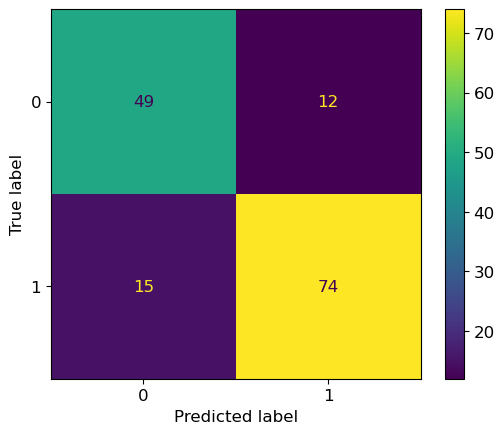

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matrix = confusion_matrix(y_test_risk_vs_norisk, preds,
                           labels=final_binary_classifier.classes_)
ConfusionMatrixDisplay(matrix, display_labels=final_binary_classifier.classes_).plot()
plt.show()

### Question 27 (0,5 pt)
Commentez cette matrice de précision.

Considéreriez vous possible d'utilise ce classifieur pour décider, sur la base de ces quelques mesures faciles à obtenir en autonomie, quelles femmes référer pour un suivi médical attentif de leur grossesse ?

Les termes sur les diagonales sont dominants. Le modèle est plutôt efficace : on trouve un taux de mauvaise prédiction de $\frac{15+12}{150}=0,18$. C'est cohérent avec la précision équilibrée élevée que nous avons trouvé plus haut.
  
__Nous pensons qu'il serait possible d'utiliser ce modèle pour décider quelles femmes référer à un médecin.__ Certes, il fait des erreurs, dont $\frac{15}{150}=10\%$ de faux négatifs, mais il permet déjà de référer facilement un bon nombre de personnes à risque sans la présence d'un médecin.
  
On pourrait donc imaginer d'utiliser ce modèle pour diminuer l'intervalle de temps entre contrôles à la grossesse. Par exemple, on pourrait soumettre ces femmes à ce test entre chaque rendez-vous avec le médecin pour obtenir un suivi plus fin. Détecter les faux négatifs restera à la charge du médecin, mais on pourra ainsi espérer identifier la plupart des cas à risque plus vite.

# 3. Classification multi-classe

### Question 28 (0,5 pt)
Parmi les algorithmes d'apprentissage supervisé que vous avez utilisé dans la section 2, le(s)quel(s) se prête(nt) directement à entraîner un classifieur multiclasse ?

Les algorithmes de la section précédente se prêtant à la classification multi-classe sont :
- L'arbre de décision ;
- Les k-plus proches voisins.

### Question 29 (1,5 pt)
Choisissez un des algorithmes mentionnés à la question précédente et entraînez-le sur le problème de classification multi-classe consistant à prédire le niveau (0, 1 ou 2) de risque obstétrique. Optimisez le ou les hyperparamètre(s) le(s) plus pertinent(s).

/opt/miniconda3/envs/sdd2025/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


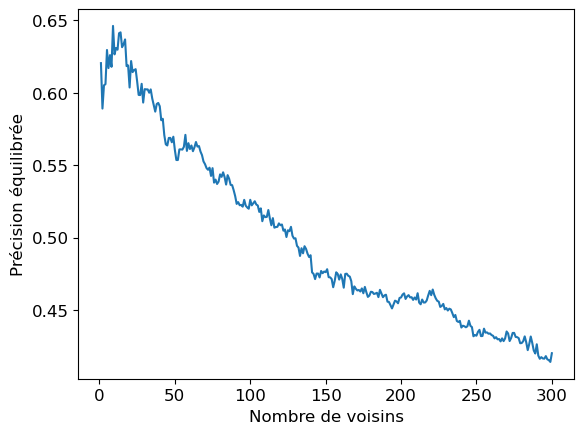

Meilleur paramètre : k = 9
Précision associée : 0.6461567318086134


In [33]:
df_train = pd.read_csv('./data/donnees_entrainement.csv')
y_train = df_train['Risque'].to_numpy()

scaler = preprocessing.Normalizer()
X_train = scaler.transform(df_train.drop(['Risque'],axis = 1))
scaler.fit(X_train)

neighbours = np.linspace(1,300,300, endpoint=True, dtype=np.uint32)
grille_param = {
    'n_neighbors': neighbours
    }

kvoisins = KNeighborsClassifier()
grille = GridSearchCV(kvoisins, grille_param, cv=10, scoring='balanced_accuracy')
grille.fit(X_train, y_train)

plt.plot(neighbours, grille.cv_results_['mean_test_score'])
plt.xlabel('Nombre de voisins')
plt.ylabel('Précision équilibrée')
plt.show()

print(f'Meilleur paramètre : k = {grille.best_params_['n_neighbors']}')
print(f'Précision associée : {np.max(grille.cv_results_['mean_test_score'])}')

### Question 30 (1pt)
Utilisez cet algorithme pour entraîner un modèle multi-classe final sur l'ensemble des données d'entraînement. Évaluez ce modèle sur les données de test. Commentez.

Le meilleur résultat est obtenu pour $k=9$ voisin.

In [34]:
df_test = pd.read_csv('./data/donnees_reservees.csv')
y_test = df_test['Risque'].to_numpy()
scaler = preprocessing.Normalizer()
X_test = scaler.fit_transform(df_test.drop(['Risque'], axis = 1))


# Modèle
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train,y_train)
preds = model.predict(X_test)

print(f'Précision obtenue : {balanced_accuracy_score(y_test, preds)}')

Précision obtenue : 0.7151416304226608


La précision est moins bonne que lorsque l'on a seulement 2 classes. C'est logique car on cherche à davantage distinguer les individus, avec pourtant le même nombre de données.